In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt 
import seaborn as sns

load_dotenv()

DB_URL = os.getenv("DATABASE_URL")

engine = create_engine(DB_URL)


df = pd.read_sql("SELECT * FROM weather_data", engine)
df['timestamp'] = df['timestamp'].dt.tz_convert('Asia/Kolkata')
df.head()


,id,city,timestamp,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
0,1,Ahmedabad,2025-11-16 00:16:38.567400+05:30,20.2,46.0,3.500000,35.85,34.75,26.85,72.0
1,2,Bengaluru,2025-11-16 00:16:38.376559+05:30,20.2,88.0,2.888889,44.85,43.15,36.95,53.0
2,3,Bhopal,2025-11-16 00:16:38.737303+05:30,18.0,28.0,2.000000,56.95,50.35,20.45,76.0
3,4,Chennai,2025-11-16 00:16:38.355079+05:30,27.0,84.0,5.611111,59.25,50.05,8.05,113.0
4,5,Dehradun,2025-11-16 00:16:38.785387+05:30,11.4,55.0,2.194444,53.05,51.85,34.55,105.0


In [2]:
df.describe()

,id,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,21.914538,59.202821,2.724288,70.412872,68.099308,23.996282,100.830000
std,1125.977353,5.141691,19.416551,1.386170,41.787126,41.318282,22.016248,54.777913
min,1.000000,9.600000,15.000000,1.000000,4.150000,4.150000,0.850000,0.000000
25%,975.750000,18.200000,43.000000,1.805556,41.950000,39.850000,8.150000,63.000000
50%,1950.500000,22.200000,58.000000,2.388889,64.150000,62.050000,19.150000,88.000000
75%,2925.250000,26.100000,74.000000,3.305556,87.950000,84.950000,33.450000,135.000000
max,3900.000000,33.400000,100.000000,9.000000,258.850000,256.050000,160.550000,398.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype                       
---  ------            --------------  -----                       
 0   id                3900 non-null   int64                       
 1   city              3900 non-null   object                      
 2   timestamp         3900 non-null   datetime64[ns, Asia/Kolkata]
 3   temperature       3900 non-null   float64                     
 4   humidity          3900 non-null   float64                     
 5   wind_speed        3900 non-null   float64                     
 6   pm10              3900 non-null   float64                     
 7   pm2_5             3900 non-null   float64                     
 8   nitrogen_dioxide  3900 non-null   float64                     
 9   ozone             3900 non-null   float64                     
dtypes: datetime64[ns, Asia/Kolkata](1), float64(7), int64(1), object(1)
memo

In [4]:
df.isnull().sum()

id                  0
city                0
timestamp           0
temperature         0
humidity            0
wind_speed          0
pm10                0
pm2_5               0
nitrogen_dioxide    0
ozone               0
dtype: int64

In [5]:
numeric_cols = ["temperature","humidity","wind_speed","pm10","pm2_5","nitrogen_dioxide","ozone"]

df[numeric_cols] = df.groupby("city")[numeric_cols].transform(
    lambda x: x.interpolate(method="linear", limit_direction="both")
)

In [6]:
df.isnull().sum()

id                  0
city                0
timestamp           0
temperature         0
humidity            0
wind_speed          0
pm10                0
pm2_5               0
nitrogen_dioxide    0
ozone               0
dtype: int64

In [7]:
df.nunique()

id                  3855
city                  15
timestamp           3855
temperature          224
humidity              75
wind_speed            80
pm10                 887
pm2_5                889
nitrogen_dioxide     699
ozone                283
dtype: int64

In [8]:
df_min_pm10 = pd.read_sql("""
SELECT city , MIN(pm10) AS min_pm10
FROM weather_data
GROUP BY city
ORDER BY min_pm10
LIMIT 5
""", engine)


In [9]:
df_max_pm10 = pd.read_sql("""
SELECT city , Max(pm10) AS max_pm10
FROM weather_data
GROUP BY city
ORDER BY max_pm10 DESC
LIMIT 5
""", engine)

In [10]:
df_max_pm2_5 = pd.read_sql("""
SELECT city , MAX(pm2_5) AS max_pm2_5
FROM weather_data
GROUP BY city
ORDER BY max_pm2_5 DESC
LIMIT 5
""", engine)


In [11]:
df_min_pm2_5 = pd.read_sql("""
SELECT city , MIN(pm2_5) AS min_pm2_5
FROM weather_data
GROUP BY city
ORDER BY min_pm2_5
LIMIT 5
""", engine)


In [12]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,id,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
id,1.000000,0.075204,0.146657,-0.002590,0.115684,0.122795,0.002627,-0.004533
temperature,0.075204,1.000000,-0.406203,0.430508,-0.196844,-0.199640,-0.321549,0.307542
humidity,0.146657,-0.406203,1.000000,0.115774,0.082972,0.080663,0.176668,-0.238501
wind_speed,-0.002590,0.430508,0.115774,1.000000,-0.359779,-0.370305,-0.341225,0.076465
pm10,0.115684,-0.196844,0.082972,-0.359779,1.000000,0.998977,0.687347,-0.190180
pm2_5,0.122795,-0.199640,0.080663,-0.370305,0.998977,1.000000,0.702309,-0.199265
nitrogen_dioxide,0.002627,-0.321549,0.176668,-0.341225,0.687347,0.702309,1.000000,-0.449620
ozone,-0.004533,0.307542,-0.238501,0.076465,-0.190180,-0.199265,-0.449620,1.000000


# "Correlation between different variables"

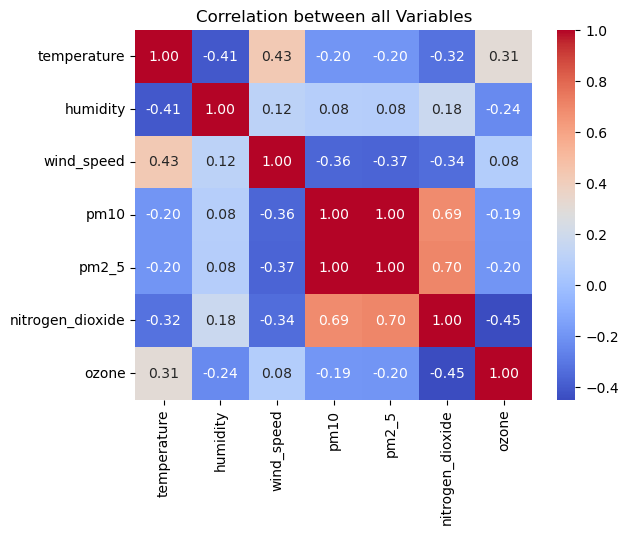

In [13]:
num_columns = ['temperature','humidity','wind_speed','pm10','pm2_5','nitrogen_dioxide','ozone']

sns.heatmap(df[num_columns].corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation between all Variables')
plt.show()


# "Boxplot of all Numeric Columns"

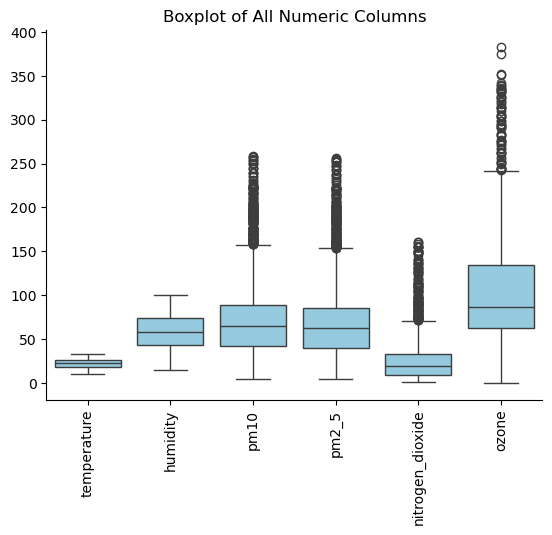

In [14]:
num_columns = ['temperature','humidity','pm10','pm2_5','nitrogen_dioxide','ozone']

sns.boxplot(data=df[num_columns],color='skyblue')
plt.xticks(rotation=90)
plt.title('Boxplot of All Numeric Columns')
sns.despine()
plt.show()

# "MIN & MAX PM10 AND PM2.5"

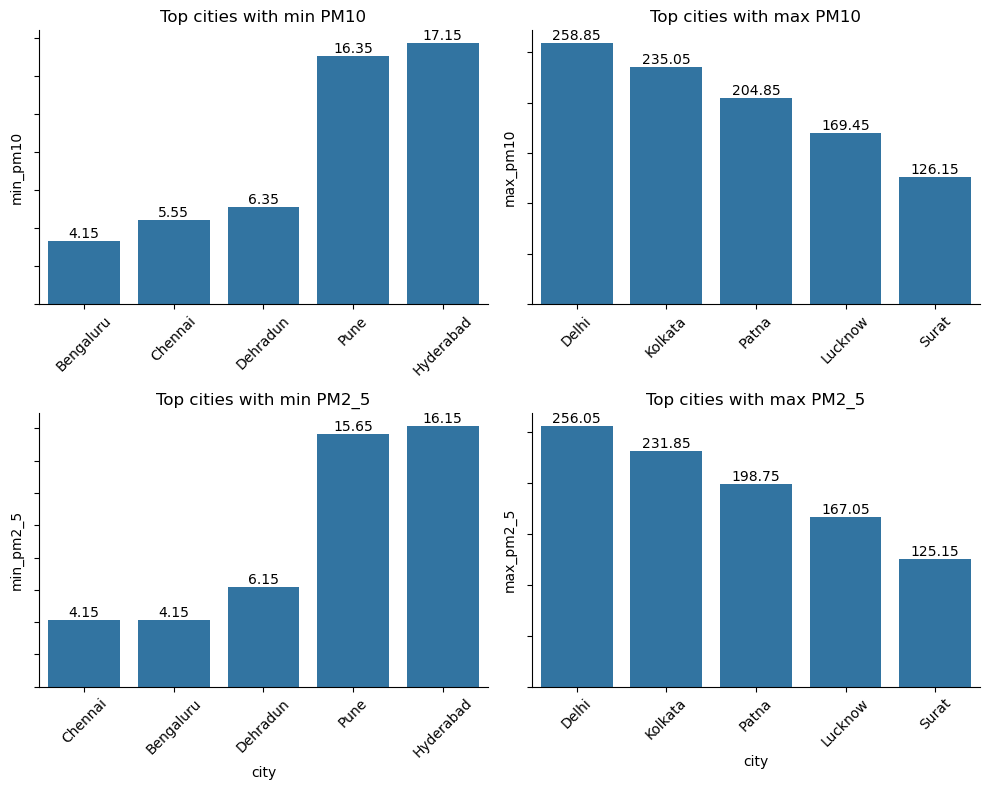

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.barplot(data=df_min_pm10, x='city',y='min_pm10', ax=axes[0,0])
axes[0,0].set_title("Top cities with min PM10")
axes[0,0].bar_label(axes[0,0].containers[0])

sns.barplot(data=df_max_pm10, x='city',y='max_pm10', ax=axes[0,1])
axes[0,1].set_title("Top cities with max PM10")
axes[0,1].bar_label(axes[0,1].containers[0])

sns.barplot(data=df_min_pm2_5, x='city',y='min_pm2_5', ax=axes[1,0])
axes[1,0].set_title("Top cities with min PM2_5")
axes[1,0].bar_label(axes[1,0].containers[0])

sns.barplot(data=df_max_pm2_5, x='city',y='max_pm2_5', ax=axes[1,1])
axes[1,1].set_title("Top cities with max PM2_5")
axes[1,1].bar_label(axes[1,1].containers[0])

for ax in axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

for ax in axes.flat:
    ax.set_yticklabels([])   # removes numbers

for ax in axes[0]:
    ax.set_xlabel('')

sns.despine()
plt.tight_layout()
plt.show()

In [16]:
df_avg_temp = pd.read_sql("""
SELECT
    city,
    ROUND(AVG(temperature)::numeric) AS avg_temp
FROM weather_data
GROUP BY city
ORDER BY avg_temp DESC
LIMIT 10""", engine)


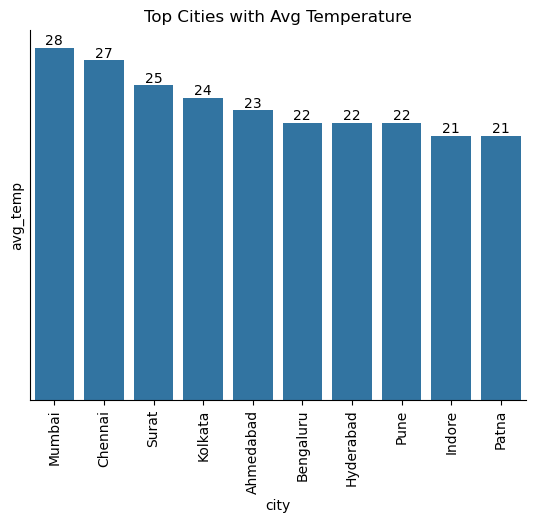

In [17]:
ax = sns.barplot(df_avg_temp, x='city', y='avg_temp')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
ax.set_yticks([])
plt.title("Top Cities with Avg Temperature")
sns.despine()
plt.show()